# Lista de exercícios sobre estatística

**Estudante**: *SOLUÇÃO*

---

Faça uma cópia deste colab e entregue-o via SIGAA.

**Atenção**: Procure responder as questões abaixo com atenção. Uma boa resposta não deve conter apenas fórmulas e cálculos, mas boas explicações que permitam identificar que você compreendeu a teoria e a prática do assunto. Você pode mesclar suas respostas com trechos de código, se desejar.


#Questão 1
Semeadura de nuvens, um processo em que químicos, tais
como iodeto de prata e dióxido de carbono congelado, são introduzidos nas nuvens por avião para provocar chuva, foi amplamente usada no século XX. A pesquisa 
[“Reassessment of Rain Enhancement Experiments and Operations in Israel Including Synoptic Considerations”, Journal of Atmospheric Research (2010, Vol. 97(4), pp. 513-525)] questiona a eficiência deste método. Um experimento foi feito estabelecendo aleatoriamente que 52 nuvens seriam semeadas ou não. A quantidade de chuva gerada foi então medida em acre-pé. A seguir, os dados de nuvens semeadas e não semeadas:

Categoria | Quantidade de Chuva |
---|---|
**Não semeadas** | 81,2 26,1 95,0 41,1 28,6 21,7 11,5 68,5 345,5 321,2 1202,6 1,0 4,9 163,0 372,4 244,3 47,3 87,0 26,3 24,4 830,1 4,9 36,6 147,8 17,3 29,0 |
**Semeadas** | 274,7 302,8 242,5 255,0 17,5 115,3 31,4 703,4 334,1 1697,8 118,3 198,6 129,6 274,7 119,0 1656,0 7,7 430,0 40,6 92,4 200,7 32,7 4,1 978,0 489,1 2745,6 |

Com base em seus conhecimentos estatísticos, discuta se a semeadura de nuvens afeta a quantidade de chuva.

**Solução**: Para saber se a semeadura afeta a quantidade de chuva iremos comparar isso faremos um teste de hipótese para diferenças individuais com seguintes as hipóteses:
$H_0: \mu_{SEM} = \mu_{NSEM} \\
H_a: \mu_{SEM} \gt \mu_{NSEM}$. 

Começaremos construindo os dados das nuvens semeadas e não semeadas, para conhecê-los melhor.

44.2 DescribeResult(nobs=26, minmax=(1.0, 1202.6), mean=164.58846153846156, variance=77521.26266153844, skewness=2.6256238268217693, kurtosis=6.461547010268017)
221.6 DescribeResult(nobs=26, minmax=(4.1, 2745.6), mean=441.9846153846154, variance=423523.94215384615, skewness=2.2924315752347404, kurtosis=4.691325607619277)


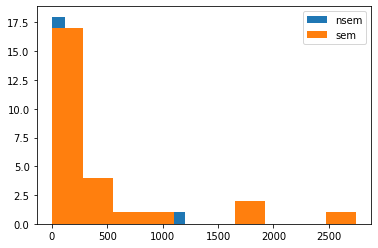

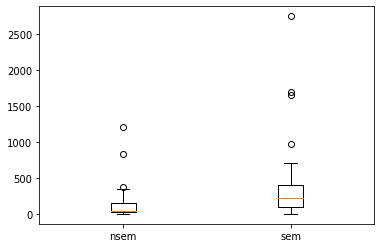

In [ ]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

nsem = np.array([81.2,26.1,95.0,41.1,28.6,21.7,11.5,68.5,345.5,321.2,1202.6,
                 1.0,4.9,163.0,372.4,244.3,47.3,87.0,26.3,24.4,830.1,4.9,36.6,
                 147.8,17.3,29.0])
sem = np.array([274.7,302.8,242.5,255.0,17.5,115.3,31.4,703.4,334.1,1697.8,118.3,198.6,
       129.6,274.7,119.0,1656.0,7.7,430.0,40.6,92.4,200.7,32.7,4.1,978.0,489.1,
       2745.6])

print(np.median(nsem),st.describe(nsem))
print(np.median(sem),st.describe(sem))
plt.hist(nsem,label='nsem')
plt.hist(sem,label='sem')
plt.legend()
plt.show()
plt.boxplot([nsem,sem],labels=['nsem','sem'])
plt.show()

A **forte assimetria** nos dados nos impede de usar testes de hipóteses cuja suposição de normalidade é presumida (Teste T). Além disso, sabemos que **a média não é representativa nestes casos**, sendo aconselhável o uso da mediana.

Podemos então usar um `Teste U de Mann-Whitney` para mediana.

In [ ]:
st.mannwhitneyu(sem,nsem,alternative='greater')

MannwhitneyuResult(statistic=473.0, pvalue=0.0069156486351175175)

Abaixo também construíremos um teste bootstrap para verificar este resultado. O teste parte do entendimento de que **se $H_0$ é válida**, **então podemos considerar os dados todos como de uma mesma população**. Assim, as diferenças de repetidas subamostras destes dados podem ser usadas para construir a distribuição empírica da mediana sob $H_0$ e assim observar quão "estranho" é a diferença de medianas observada entre os tratamentos.

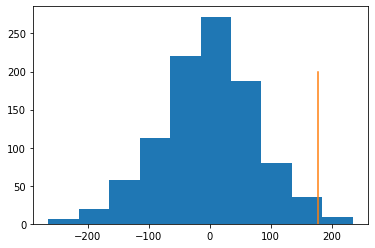

T0 =  177.39999999999998
p-valor =  0.015


In [ ]:
import random

def reamostra(dados,n1,n2):
 pageA = random.choices(dados,k=n1)
 pageB = random.choices(dados,k=n2)
 return np.median(pageA) - np.median(pageB)

def boot(dados,n1,n2,t0,R=10000):
 Td = []
 for i in range(R):
   Td.append(reamostra(dados,n1,n2))
 plt.hist(Td)
 plt.plot([t0,t0],[0,200])
 plt.show()
 pvalor = sum(i > t0 for i in Td)/R
 print("T0 = ",t0)
 print("p-valor = ",pvalor)

t0 = np.median(sem) - np.median(nsem)
total = np.concatenate([sem,nsem])
boot(total,26,26,t0,R=1000)

Por ambos os testes concluímos à 95% de confiança que este processo de semeadura é eficaz.

#Questão 2
Os seguintes dados são os números de ciclos, até falhar, de corpos de prova de alumínio, sujeitos a uma tensão alternada repetida, de 21.000 psi e 18 ciclos por segundo.

1115
1310
1540
1502
1258
1315
1085
798
1020
865
2130
1421
1109
1481
1567
1883
1203
1270
1015
845
1674
1016
1102
1605
706
2215
785
885
1223
375
2265
1910
1018
1452
1890
2100
1594
2023
1315
1269
1260
1888
1782
1522
1792
1000
1820
1940
1120
910
1730
1102
1578
758
1416
1560
1055
1764
1330
1608
1535
1781
1750
1501
1238
990
1468
1512
1750
1642

Com base em seus conhecimentos de estatística, calcule a probabilidade de que um corpo de prova “sobreviverá” além de 2000 ciclos? Justifique sua resposta.


**Solução**: Um estimador não-viesado desta probabilidade é a proporção de valores maior que 2000 no conjunto de dados. Podemos ainda calcular um intervalo de confiança para esta proporção usando a distribuição Normal Padrão e via bootstrap. Abaixo analisamos os dados e calculamos estas estatísticas.

1436.5 DescribeResult(nobs=70, minmax=(375, 2265), mean=1403.6571428571428, variance=161913.88074534162, skewness=-0.02454458285732448, kurtosis=-0.49790800072237174)


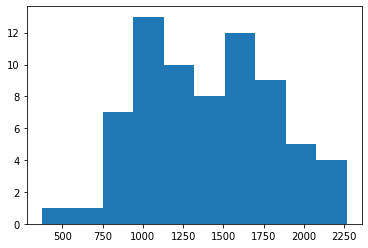

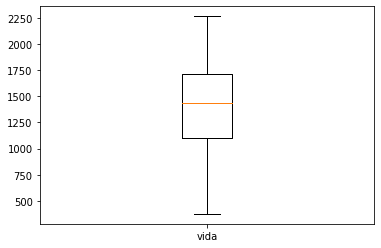

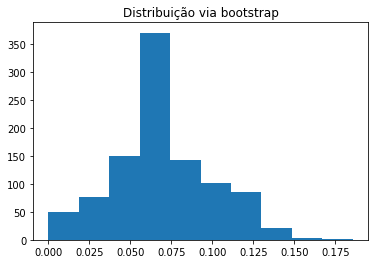

Chance de sobreviver a mais de 2000 ciclos (bootstrap) 0.07178571428571395 ± 0.043214285714285386
Chance de sobreviver a mais de 2000 ciclos (IC para proporção) 0.07142857142857142 ± 0.060332412515993424


In [ ]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

vida = np.array([1115,1310,1540,1502,1258,1315,1085,798,1020,865,2130,1421,1109,
                 1481,1567,1883,1203,1270,1015,845,1674,1016,1102,1605,706,2215,
                 785,885,1223,375,2265,1910,1018,1452,1890,2100,1594,2023,1315,
                 1269,1260,1888,1782,1522,1792,1000,1820,1940,1120,910,1730,1102,
                 1578,758,1416,1560,1055,1764,1330,1608,1535,1781,1750,1501,1238,
                 990,1468,1512,1750,1642])

print(np.median(vida),st.describe(vida))
plt.hist(vida)
plt.show()
plt.boxplot([vida],labels=['vida'])
plt.show()

p = (vida>2000).sum()/len(vida)
se = 1.96*np.sqrt(p*(1-p)/len(vida))

def boot(dados,r):
  #lista para armazenar o parametro de interesse (P(V>2000))
  theta = []
  n = len(dados)
  #obtendo as réplicas e calculando a mediana
  for i in range(r):
    Si = np.array(random.choices(list(dados),k=n))
    theta.append((Si>2000).sum()/len(Si))
  
  CIinf = np.quantile(theta,0.05)
  CIsup = np.quantile(theta,0.95)
  plt.hist(theta)
  plt.title("Distribuição via bootstrap")
  plt.show()
  centro = (CIinf+CIsup)/2
  fator = CIsup - centro
  return str(centro)+" ± "+str(fator)

print("Chance de sobreviver a mais de 2000 ciclos (bootstrap)",boot(vida,1000))
print("Chance de sobreviver a mais de 2000 ciclos (IC para proporção)",p,"±",se)

A despeito de algumas variações, destes resultados estimamos que há uma chance de aproximadamente 7% de que um corpo de prova sobreviva 2000 ciclos. 

Podemos ainda **assumir que esta amostra é representativa da forma da distribuição da população** e estimar a partir destes dados os parâmetros de uma distribuição de probabilidade. Assim, poderemos estimar a chance de que um corpo de prova sobreviva 2000 ciclos a partir da distribuição.

Embora o histograma revele duas modas, vemos que os dados são razoavelmente simétricos. Portanto iremos usar a distribuição normal neste caso. Abaixo fazemos a estimativa dos parâmetros $\mu$ e $\sigma$ da Distribuição Normal via MLE e mostramos a qualidade do ajuste via teste de aderência $\chi^2$.

Parâmetros (1403.6571428571428, 399.500720032045)


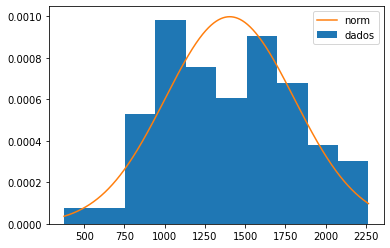

[375, 800, 1000, 1100, 1250, 1350, 1500, 1600, 1750, 2000, 2265]
[5, 6, 6, 8, 8, 5, 10, 7, 10, 5]
[4.226352276155034, 6.353223433858625, 4.721432794596687, 8.866093659358677, 6.742408921396842, 10.409364416011318, 6.521861379703685, 8.299142276330354, 8.766271161901894, 3.6550678651603663]
6.364502831456642
0.497890027953114


In [ ]:
params = st.norm.fit(vida)

sup = np.linspace(min(vida),max(vida),1000)
plt.hist(vida,label="dados",density=True)
plt.plot(sup,st.norm.pdf(sup,params[0],params[1]),label="norm")
print("Parâmetros",params)
plt.legend()
plt.show()

mu = params[0]
sigma = params[1]

X = vida

X.sort()
splitarray = [min(X),800,1000,1100,1250,1350,1500,1600,1750,2000,max(X)]
print(splitarray)

obs=[0]*(len(splitarray)-1)
esp=[0]*(len(splitarray)-1)

for x in X:
  for i in range(len(obs)):
    if x <= splitarray[i+1]:
      obs[i] += 1
      break

for i in range(len(obs)):
  sup = st.norm.cdf(splitarray[i+1],mu,sigma)
  inf = st.norm.cdf(splitarray[i],mu,sigma)
  p = sup-inf
  esp[i] = len(X)*p

print(obs)
print(esp)
(chi_stat, p_value) = st.chisquare(obs,esp,ddof=len(params))
print(chi_stat)
print(p_value)

Com base nisso, podemos estimar a $P(\text{Vida}\gt 2000) = 1 - F_{\text{N(1403.66,399.50)}}(2000)$

In [ ]:
p = 1 - st.norm.cdf(2000,params[0],params[1])
print("Chance de sobreviver a mais de 2000 ciclos (distr Normal)",p)

Chance de sobreviver a mais de 2000 ciclos (distr Normal) 0.06775520127711976


#Questão 3

Uma amostra com seis resistores resultou nas seguintes resistências (ohms): $x_1 = 45$, $x_2 = 38$, $x_3 = 47$, $x_4 = 41$, $x_5 = 35$ e $x_6 = 43$.

a. Calcule a variância ($s^2$) e o desvio-padrão ($s$) da amostra.

b. Subtraia 35 de cada uma das medidas originais de resistências e calcule $s^2$ e $s$. Compare seus resultados com aqueles obtidos no item (a) e explique sua resposta.

c. Se as resistências fossem 450; 380; 470; 410; 350 e 430 ohms, você poderia usar os resultados dos itens anteriores deste problema para encontrar $s^2$ e $s$?


**Solução**: Para o item (a) devemos observar que se trata dos valores amostrais e **portanto devemos subtrair 1 do denominador**. 

No item (b) sabemos que ao **subtrairmos uma constante de uma VA sua variância não muda**, consequentemente seu desvio-padrão não muda também. 

No item (c), vemos que os valores oferecidos, são os valores originais multiplicados por 10. Assim sabemos que a variância será 100 vezes maior e que o desvio-padrão será 10 vezes maior.

Abaixo mostramos códigos para suportar estas respostas.

In [ ]:
import numpy as np

dados = np.array([45,38,47,41,35,43])
#a
print("Variância",np.var(dados,ddof=1))
print("Desvio padrão",np.std(dados,ddof=1))

#b
dados35 = dados-35
print("Variância",np.var(dados35,ddof=1))
print("Desvio padrão",np.std(dados35,ddof=1))

#c
dados10 = dados*10
print("Variância",np.var(dados10,ddof=1))
print("Desvio padrão",np.std(dados10,ddof=1))

Variância 19.9
Desvio padrão 4.460941604639093
Variância 19.9
Desvio padrão 4.460941604639093
Variância 1990.0
Desvio padrão 44.609416046390926


#Questão 4

Em alguns conjuntos de dados, uma transformação por alguma função matemática aplicada aos dados originais, tais como $\sqrt{y}$ ou $\log{y}$, pode resultar em dados que sejam mais fáceis de trabalhar, estatisticamente, do que os dados originais. Para
ilustrar o efeito de uma transformação, considere os seguintes dados, que representam ciclos de falhas de um tecido: 675; 3650; 175; 1150; 290; 2000; 100; 375.

a. Construa um histograma, um diagrama de caixa e um gráfico de quantis e comente sobre a forma da distribuição dos dados.

b. Transforme os dados usando logaritmos; isto é, seja $y*$ (novo valor) $= \log{y}$ (log natural do valor valor antigo). Construa os três gráficos novamente para os dados transformados e faça comentários a respeito
do efeito da transformação.

**Solução**: Abaixo mostramos os gráficos solicitados para os dados originais (primeira linha de 3 gráficos) e para os dados transformados (segunda linha de 3 gráficos). 

Observa-se que esta transformação modificou os dados sobremaneira da seguinte forma:
* Um dos dados (3650) que estava indicado como *outlier* (boxplot) deixou de sê-lo
* Os dados passaram a apresentar uma distribuição uniforme entre 4.5 e 8.0 (histograma), mas também não pode ser descartada a aproximação com a distribuição normal.

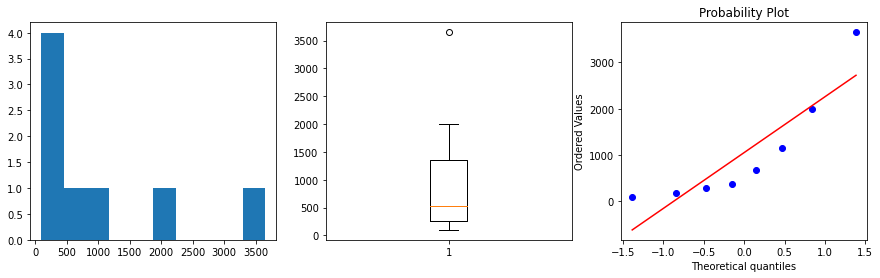

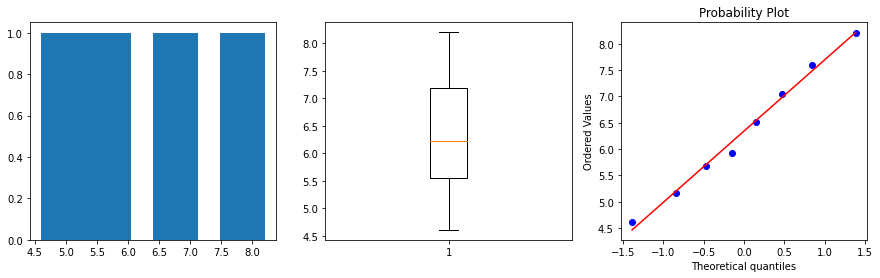

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st


def graficos(d):
  plt.figure(figsize=(15,4))
  plt.subplot(1,3,1)
  plt.hist(d)
  plt.subplot(1,3,2)
  plt.boxplot(d)
  plt.subplot(1,3,3)
  st.probplot(d,dist='norm',plot=plt)
  plt.show()

dados = np.array([675, 3650, 175, 1150, 290, 2000, 100, 375])
dadoslog = np.log(dados)
graficos(dados)
graficos(dadoslog)

#Questão 5

A quantidade de tempo que um consumidor gasta esperando
no balcão de check-in de um aeroporto é uma variável aleatória, com média de 8,2 minutos e desvio-padrão de 1,5 minuto. Suponha que uma amostra aleatória de n = 49 consumidores seja observada. Encontre a probabilidade de que o tempo médio de espera na fila para
esses consumidores seja:

a. Menor do que dez minutos

b. Entre cinco e dez minutos

c. Menor do que seis minutos

**Solução**: Como estamos falando de analisar <u>probabilidades a respeito do tempo médio</u> ($\bar{X}$), podemos empregar o teorema do limite central para inferir que a distribuição do tempo médio é normalmente distribuída com média $E(\bar{X})=8.2$ e $std(\bar{X}) = 1.5/\sqrt{49} = 0.2143$.

De posse destes dados, aplicamos probabilidade básica para resolver as questões como mostrado abaixo.

In [ ]:
import numpy as np
import scipy.stats as st

mu = 8.2
sigma = 1.5/np.sqrt(49)
#a
print("Menor que 10 min",st.norm.cdf(10,mu,sigma))
#b
print("Entre 5 e 10 min",st.norm.cdf(10,mu,sigma)-st.norm.cdf(5,mu,sigma))
#c
print("Menor que 6 min",st.norm.cdf(6,mu,sigma))

Menor que 10 min 1.0
Entre 5 e 10 min 1.0
Menor que 6 min 4.979313594150204e-25


#Questão 6

Uma população normal tem média igual a 100 e variância igual a 25. Quão grande tem de ser a amostra aleatória, se quisermos que o erro-padrão da média amostral seja igual a 1,5?

**Solução**: Sabemos que o erro padrão de $\bar{X}$ é dado por $std(\bar{X}) = \frac{\sigma}{\sqrt{n}}$, logo 

$n = \frac{\sigma^2}{std(\bar{X})^2} = \frac{25}{2.25} = 11.11 \sim 12$

#Questão 7

Uma amostra aleatória foi retirada de uma distribuição normal e os seguintes intervalos de confiança construídos usando os mesmos dados: $(38.02; 61.98)$ e $(39.95; 60.05)$.

a. Qual é o valor da média da amostra?

b. Sabendo que um desses intervalos é de 95% de confiança e o outro é de 90% de confiança, indique qual deles é o de 95 % de confiança e por quê?

**Solução**: 

a) Obtemos a média da amostra, encontrando o ponto médio do intervalo de confiança, que é igual à 50, sendo o mesmo para as duas amostras, visto se tratar de IC para a média sobre a mesma amostra.

In [ ]:
pm1 = (61.98+38.02)/2
pm2 = (60.05+39.95)/2
print(pm1,pm2)

50.0 50.0


b) O intervalo de menor amplitude ($(39.95;60.05)$) é o intervalo de 90% de confiança, visto que quanto maior o nível de confiança, mais largo é o IC.

#Questão 8

As pesquisas para a eleição presidencial de 2018 do estado de São Paulo forneceram os seguintes resultados. Havia 2020 pessoas consultadas nas pesquisas e 768 eram graduadas em faculdades. Das pessoas graduadas em faculdades, 412 votaram em Haddad. Das pessoas não graduadas 536 votaram em Haddad. Assim:

a. Calcule um intervalo de confiança de 95% para a proporção de pessoas graduadas em São Paulo que votaram em Haddad.

b. Ter ou não graduação influencia no voto em Haddad?

**Solução**: 

a) Para o cálculo do IC primeiramente estimamos $\hat{p}=\frac{412}{768}=0.5365$ que é uma boa estimativa do proporção na população. Para o IC, precisamos calcular o erro padrão $\sqrt{\frac{p(1-p)}{n}} = \sqrt{\frac{0.5365 \times 0,4635}{768}} \cong 0.018$ e assim fazemos $0.5365 \pm 1.96 \times 0.018 = 0.5365 \pm 0.0353$, ou $(0.5012;0.5718)$

b) Para isto, podemos elaborar uma tabela de contigência e usar um teste qui-quadrado para este caso. Abaixo montamos a tabela e executamos o teste.

Cont| graduado | não-graduado |
---|---|---|
Haddad | 412 | 536 |
não-Haddad | 356 | 716 |


In [ ]:
import scipy.stats as st
import numpy as np

tabela = np.array([
  # votos em Haddad
  [412,536], #graduados / não-graduados
  # votos não Haddad
  [356,716] #graduados / não-graduados
])

########################
(chi_stat, p_value, degrees_of_freedom, expected) = st.chi2_contingency(tabela)
print(chi_stat)
print(p_value)
print(degrees_of_freedom)
print(expected)

22.001681944666025
2.7241164037320984e-06
1
[[360.42772277 587.57227723]
 [407.57227723 664.42772277]]


O valor p obtido no teste nos permite rejeitar a hipótese de independência (à 95% de confiança), indicando que há evidência estatística suficiente para atestar que a graduação influencia no voto.

#Questão 9

Uma empresa de eletricidade instalou medidores especiais
em dez casas de uma subdivisão que mede o consumo de energia a cada hora do dia. A companhia está interessada na demanda de energia em uma hora específica – a hora em que o sistema experimenta o pico de consumo. Os dados (em kW) desses dez medidores são: 23,1; 15,6; 17,4; 20,1; 19,8; 26,4; 25,1; 20,5;
21,9 e 28,7. 

Se $\mu$ for o verdadeiro pico médio da demanda para as
dez casas nesse grupo tendo medidores especiais, estime $\mu$. Agora, suponha que a empresa queira estimar a demanda na hora do pico para todas as 5000 casas nessa subdivisão. Seja $\theta$ essa grandeza. **Estime $\theta$ usando os dados fornecidos anteriormente**.

**Estime ainda a proporção de casas na subdivisão que demanda no mínimo 20 kW na hora de pico do sistema**.

**Solução**: O melhor estimador para $\mu$ é $\bar{x} =21.86$. 

Para estimar $\theta$, sabemos que cada casa tem consumo em média $\mu$, portanto a demanda média das casas somadas será $\theta = \sum_{i} \mu = 5000 \bar{x} = 109300$ kW.

A melhor estimativa para a proporção é de 0.7

In [ ]:
import numpy as np

dados = [23.1,15.6,17.4,20.1,19.8,26.4,25.1,20.5,21.9,28.7]
print("media de consumo de uma casa", np.mean(dados))
print("media de consumo de 5000 casas", np.mean(dados)*5000)
print("proporção da demanda de 20+ kW", (np.array(dados)>20).sum()/len(dados))

media de consumo de uma casa 21.86
media de consumo de 5000 casas 109300.0
proporção da demanda de 20+ kW 0.7


#Questão 10

Um fabricante de semicondutores coleta dados provenientes de uma nova ferramenta e conduz um teste de hipóteses, com a hipótese nula sendo a largura média de uma dimensão crítica igual a 100 nm. A conclusão é de não rejeitar a hipótese nula. Esse resultado fornece
uma evidência forte de que a média da dimensão crítica é igual a 100 nm? Explique.

**Solução**: 

**Rejeitar a hipótese nula, não significa aceitar a hipótese nula**. 

A estrutura básica de todo teste de hipótese envolve assumir que $H_0$ é verdadeira e, diante disso, buscar por evidências nos dados que contradigam $H_0$. 

Portanto, quando não rejeitamos $H_0$ não temos como saber se ela é verdadeira ou não, apenas podemos dizer que não encontramos as evidências para contradizê-la.

# Questão 11

Um artigo publicado em *Growth: A Journal Devoted to Problems of Normal and Abnormal Growth* [“Comparison of Measured and Estimated Fat-Free Weight, Fat, Potassium and Nitrogen of Growing Guinea Pigs” (1982, Vol. 46(4), pp. 306-321)] mediu o peso (em gramas) do corpo dos leitões em seu nascimento.

421,0 452,6 456,1 494,6 373,8 90,5 110,7 96,4 81,7 102,4
241,0 296,0 317,0 290,9 256,5 447,8 687,6 705,7 879,0 88,8 296,0 273,0 268,0 227,5 279,3 258,5 296,0

a. Teste a hipótese de que o peso médio do corpo é de 300 gramas. Use $\alpha = 0.05$.

b. Qual é o menor nível de significância ao qual você estará sujeito para rejeitar a hipótese nula?

c. Explique como você responderia à pergunta do item (a)
com um intervalo bilateral de confiança para o peso médio do corpo.

**Solução**: Primeiro carregaremos os dados e checaremos suas propriedades.

290.9 DescribeResult(nobs=27, minmax=(81.7, 879.0), mean=325.4962962962963, variance=39515.68652421652, skewness=1.0351031557205745, kurtosis=0.8604677917909553)
(0.8933743834495544, 0.009465028531849384)


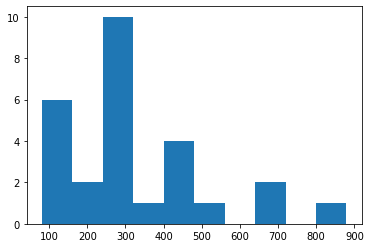

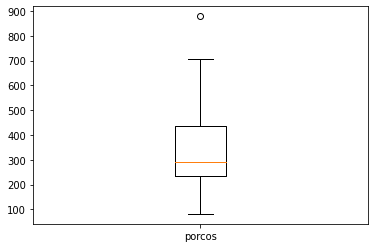

In [ ]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

porcos = np.array([421.0,452.6,456.1,494.6,373.8,90.5,110.7,96.4,81.7,102.4,241.0,
                 296.0,317.0,290.9,256.5,447.8,687.6,705.7,879.0,88.8,296.0,
                 273.0,268.0,227.5,279.3,258.5,296.0])

print(np.median(porcos),st.describe(porcos))
print(st.shapiro(porcos))
plt.hist(porcos)
plt.show()
plt.boxplot([porcos],labels=['porcos'])
plt.show()

Os dados aparentam desvio em relação à normalidade (múltiplas modas no histograma, 1 outlier no boxplot, assimetria elevada). Por estas razões deveríamos usar um teste não-paramétrico. Contudo, o Teste dos postos sinalizados de Wilcoxon é adequado para o teste de médias (exigido no item (a)) apenas quando não há assimetria nos dados, o que não é o caso.

Portanto, para validar a hipótese do item a) entendemos que é melhor usar um teste T com $H_0: \mu = 300$ e $H_a: \mu \neq 300$. O teste abaixo mostra que não podemos rejeitar a hipótese de que a média dos dados é 300.

O p valor obtido nos permite responder o item (b), indicando que o menor nível de significância par rejeitar $H_0$ é $0.51$.

In [ ]:
import scipy.stats as st

print(st.ttest_1samp(porcos,300))

Ttest_1sampResult(statistic=0.6664601918592659, pvalue=0.510988070884212)


Também poderíamos responder os itens (a) e (b) realizando um teste de hipótese via bootstrap para uma amostra. 

Para este teste, considere que podemos construir a VA $Y = \bar{X}-\bar{x}+\mu_0$, onde $X$ é a VA da média amostral dos pesos dos leitões (população), $\bar{x}$ é média amostral dos pesos dos leitões e $\mu_0$ é a média que acreditamos ser a da população. Sabemos que $E(Y) = E(\bar{X}-\bar{x}+\mu_0) = E(\bar{X})-E(\bar{x})+E(\mu_0) = \mu_0$.

Assumindo que $H_0: \mu = \mu_0$ é verdadeira, então $E(Y)=E(\bar{Y})=\mu_0=\mu=E(X)$. Nós podemos usar o método bootstrap para construir a distribuição empírica de $\bar{Y}$ e daí calculamos $P(\bar{Y} \gt \bar{x})$, que será nosso valor p.

P valor 0.258


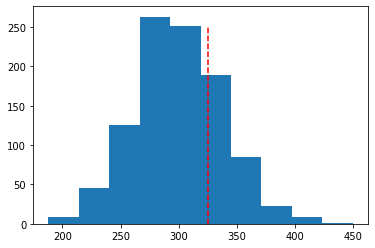

In [ ]:
import random

x = porcos
xbar = np.mean(x)
mu0 = 300
y = x-xbar+mu0

r = 1000
ybar = []
n = len(y)
for i in range(r):
  amostra = np.array(random.choices(list(y),k=n))
  ybar.append(np.mean(amostra))

print("P valor",(ybar>xbar).sum()/len(ybar))
plt.hist(ybar)
plt.plot([xbar,xbar],[0,250],'r--')
plt.show()

Por este teste, não podemos rejeitar a hipótese de igualdade também, contudo, reduzimos pela metade aproximadamente o nível de significância requerido para rejeitar $H_0$ (item (b)).

Para o item (c), podemos usar um intervalo de confiança para a média. Como $n = 27 \lt 30$ usaremos a distribuição T de Student com 26 ($n-1$) graus de liberdade. Portanto calculamos o IC para média será dado por $\bar{x} \pm t_{\frac{\alpha}{2}}std(\bar{x})$, onde $std(\bar{x})$ é o erro padrão amostral e  $\alpha = 0.05$.

Abaixo mostramos que o intervalo de confiança inclui o valor de 300 gramas, portanto não rejeitamos a hipótese nula.

In [ ]:
import scipy.stats as st
import numpy as np

alpha = 0.05
n = len(porcos)
xbar = np.mean(porcos)
se = np.std(porcos,ddof=1)/np.sqrt(n)
t = abs(st.t.ppf(alpha/2,n-1))
print(xbar,se,t)
print("IC para média 95% de confiança",xbar-se*t,xbar+se*t)

325.4962962962963 38.256292885502546 2.0555294386428713
IC para média 95% de confiança 246.85936005680196 404.1332325357906


#Questão 12

Um artigo em *Fortune* (21 de setembro de 1992) afirmou que aproximadamente metade de todos os engenheiros continua seus estudos acadêmicos além do grau de bacharelado, recebendo no final o grau de mestre ou doutor. Dados de um artigo em *Engineering Horizons* (primavera de 1990) indicaram que 117 de 484 novos engenheiros graduados estavam planejando fazer pós-graduação.

a. Os dados da *Engineering Horizons* são consistentes com a afirmação reportada pela *Fortune*? Use $\alpha = 0.05$ para alcançar as suas conclusões. Encontre o valor P para o teste.

b. Discuta como a questão do item (a) poderia ser respondida pela construção de um intervalo bilateral de confiança para $\hat{p}$.

**Solução**: Para responder à pergunta assumimos que os dados da *Fortune* são nossa população e portanto nossa hipótese nula será $H_0: p = p_0 = 0.5$. Assumindo normalidade da população, aplicaremos um teste Z para proporção.

O teste Z para proporção, parte do princípio de que uma amostragem da qual deriva uma proporção é essencialmente um experimento binomial com $n$ observações e com probabilidade de sucesso ("fazer pós-graduação", no exemplo) $p$. Neste caso, se $X$ é a VA do número de sucessos então $X \sim Binom(n,p)$ e, se $np \lt 5$ e $n(1-p) \lt 5$, podemos aproximar esta binomial por uma normal de modo que $X \sim N(np,np(1-p))$.

Tomando $H_0$ como verdadeira, então $X \sim N(np_0,np_0(1-p_0))$ e a estatística abaixo 

$z_0 = \frac{\hat{x}-np_0}{\sqrt{np_0(1-p_0)}}$

onde $\hat{x}$ é o valor observado de $X$ e se distribui como uma normal com média 0 e desvio padrão 1.

Assim, podemos calcular o valor p da seguinte forma:

$H_a : p \neq p_0 \Rightarrow \text{valor p} = 2\times (1-F_{N(0,1)}(|z_0|))\\
H_a : p \gt p_0 \Rightarrow \text{valor p} = 1-F_{N(0,1)}(|z_0|)\\
H_a : p \lt p_0 \Rightarrow \text{valor p} = F_{N(0,1)}(|z_0|)$

In [ ]:
import scipy.stats as st
import numpy as np

xhat = 117
n = 484
p0 = 0.5
z0 = (xhat-n*p0)/(np.sqrt(n*p0*(1-p0)))

print("z0",z0,"valor p",2*(1-st.norm.cdf(abs(z0))))

z0 -11.363636363636363 valor p 0.0


No caso acima consideramos a hipótese alternativa de diferença e com isso rejeitamos a hipótese nula.

b) Poderíamos ver se o intervalo de confiança para $\hat{p}$ inclui o 0. O intervalo de confiança para a proporção é calculado por

$p \pm z_{\frac{\alpha}{2}}\sqrt{\frac{p(1-p)}{n}}$.

Para 95% de confiança ($\alpha = 0.05$) temos que $z_{\frac{\alpha}{2}} = 1.96$ e então podemos calcular o intervalo de confiança, como abaixo.

In [ ]:
import scipy.stats as st
import numpy as np

alpha = 0.05
n = 484
p = 117/n

z = abs(st.norm.ppf(alpha/2))
se = np.sqrt(p*(1-p)/n)

print("O IC à 95% de confiança é dado por",p-z*se,p+z*se)

O IC à 95% de confiança é dado por 0.20359331325812627 0.279877761122039


Uma vez que o intervalo de confiança de 95 % não contém o valor
0,5, concluímos que a proporção verdadeira de estudantes de
engenharia que planejam estudos de pós-graduação difere de 0,5.

#Questão 13

Um artigo em *Biological Trace Element Research* [“Interaction of Dietary Calcium, Manganese, and Manganese Source (Mn Oxide or Mn Methionine Complex) or Chick Performance and Manganese Utilization” (1991, Vol. 29(3), pp. 217-228)] mostrou os seguintes
resultados de ensaio de manganês em tecidos do fígado de pintos alimentados com dietas ricas em Ca.

6,02 6,08 7,11 5,73 5,32 7,10 5,29 5,84 6,03 5,99 4,53 6,81

a. Teste a hipótese $H_0: \sigma^2 = 0.6$ versus $H_a: \sigma^2 \neq 0.6$, usando $\alpha = 0.01$.

b. Qual é o valor P para esse teste?

**Solução**: Para realizar este teste, faremos uso do teste qui-quadrado para variância bicaudal, o qual fazemos abaixo.

In [ ]:
import scipy.stats as st
import numpy as np

def chi2test(x, sigma0, alternative = "two-tailed"):
    n = len(x)
    df = n-1
    X = df * np.var(x,ddof=1) / sigma0**2
    pless = st.chi2.cdf(X,df)
    pgreater = 1 - pless
    ptwo = 2*min(pless,pgreater)
    if alternative == "lower":
        return X,pless
    elif alternative == "upper":
        return X,pgreater
    else:
        return X,ptwo

dados = [6.02,6.08,7.11,5.73,5.32,7.10,5.29,5.84,6.03,5.99,4.53,6.81]
chi2test(dados,np.sqrt(0.6))

(10.55004166666666, 0.9633827494377649)

O teste mostra que não podemos rejeitar a hipótese nula à $\alpha = 0.01$, dado o valor p de 0.96.

#Questão 14

Um engenheiro da computação está investigando o desempenho de duas diferentes linguagens de programação na melhoria de tarefas computacionais. Doze programadores experientes, familiarizados
com ambas as linguagens, codificaram uma função‐padrão nas duas linguagens. O tempo (em minutos) foi registrado, e os dados são mostrados a seguir.

Programador|Tempo da LP1|Tempo da LP2|
---|---|---|
1|17|18
2|16|14
3|21|19
4|14|11
5|18|23
6|24|21
7|16|10
8|14|13
9|21|19
10|23|24
11|13|15
12|18|20

a. A suposição de a diferença no tempo de codificação ser normalmente distribuída é razoável?

b. Existe evidência estatística de que uma linguagem de programação seja preferível?

**Solução**: Avaliaremos o item (a) por meio do teste de hipótese shapiro-wilk e de gráficos. Destes resultados concluímos que os dados são razoavelmente normais.

(0.939170241355896, 0.4873976409435272)


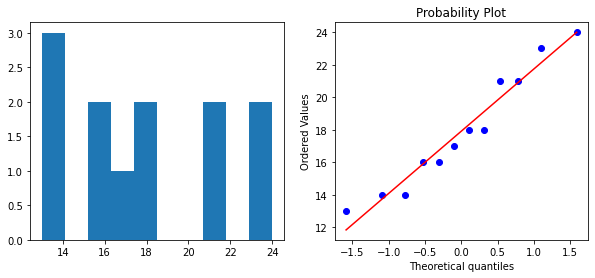

(0.9539231657981873, 0.6948422193527222)


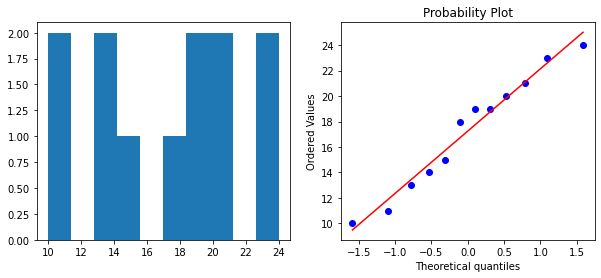

(0.9616504907608032, 0.8071103096008301)


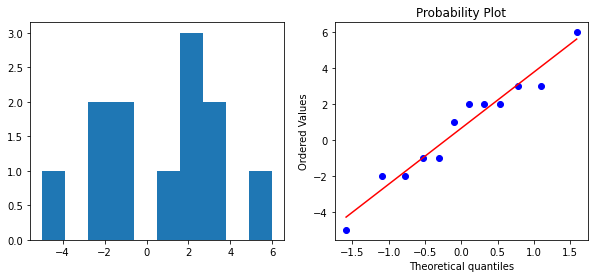

DescribeResult(nobs=12, minmax=(-5, 6), mean=0.6666666666666666, variance=8.787878787878787, skewness=-0.16361170254064852, kurtosis=-0.39881093935790757)


In [ ]:
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt

def analise_normal(dados):
  print(st.shapiro(dados))
  plt.figure(figsize=(10,4))
  plt.subplot(1,2,1)
  plt.hist(dados)
  plt.subplot(1,2,2)
  st.probplot(dados,dist='norm',plot=plt)
  plt.show()

lp1 = np.array([17,16,21,14,18,24,16,14,21,23,13,18])
lp2 = np.array([18,14,19,11,23,21,10,13,19,24,15,20])
diff = lp1-lp2

analise_normal(lp1)
analise_normal(lp2)
analise_normal(diff)
print(st.describe(diff))

Para o item (b) usaremos o teste T pareado para duas amostras bicaudal. Uma vez que o pvalor é de 0.45, não temos evidência estatística para concluir que haja diferença significativa entre os desempenhos das linguagens de programação nesta função padrão.

In [ ]:
st.ttest_rel(lp1,lp2)

Ttest_relResult(statistic=0.7790356549761621, pvalue=0.45239285834490617)